In [85]:
import sys,os
from math import *
from pathlib import Path

import h5py
import numpy as np
from numpy import square as sqr
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from copy import deepcopy
#import foxlink
from foxlink import fp_graphs as fpg
from foxlink.fp_graphs import graph_vs_time, graph_xl_dens
import importlib
#importlib.reload(foxlink.FP_analysis)
from foxlink.FP_analysis import FPAnalysis, LineDataUnits
from foxlink.stylelib.ase1_styles import ase1_runs_stl, ase1_sims_stl


# Graphing functions

In [55]:
def graph_comparison_vs_time(ax, time_arr, val_arr1, val_arr2, color='b'):
    ax.set_xlabel('Time (sec)')
    ax.tick_params(axis='y', labelcolor=color)
    comp_arr = np.abs(val_arr2-val_arr1)
    s1 = ax.scatter(time_arr, val_arr1, c=color, marker='o')
    s2 = ax.scatter(time_arr, val_arr2, facecolors='none',edgecolors=color)
    ax2 = ax.twinx()
    scomp = ax2.scatter(time_arr, comp_arr,c='r', marker='+')
    ax2.set_ylabel('Absolute Difference', color='r')
    ax2.tick_params(axis='y', labelcolor='r')
    return s1, s2

# Data compare test

## Parallel

In [80]:
# Load data
PDE_para_data = h5py.File(Path("../tests/integration_tests/PDE_ME_motion_compare/parallel/FPGenMotionMotorUWSolver.h5"),'r')
ME_para_data = h5py.File(Path("../tests/integration_tests/PDE_ME_motion_compare/parallel/MomentExpansionSolver.h5"),'r')

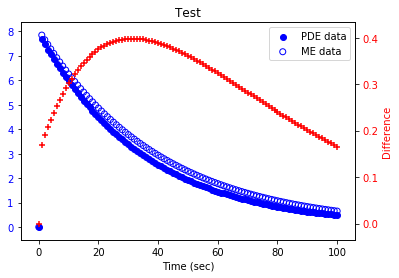

In [86]:
fig, ax = plt.subplots()
ax.set_title("Test")
time = ME_para_data['time']

PDE_arr = PDE_para_data['Analysis/XL_analysis/zeroth_moment'][:]
ME_arr = ME_para_data['XL_data/zeroth_moment'][:]

graph_comparison_vs_time(ax, time, PDE_arr, ME_arr)
ax.legend(('PDE data', 'ME data'))


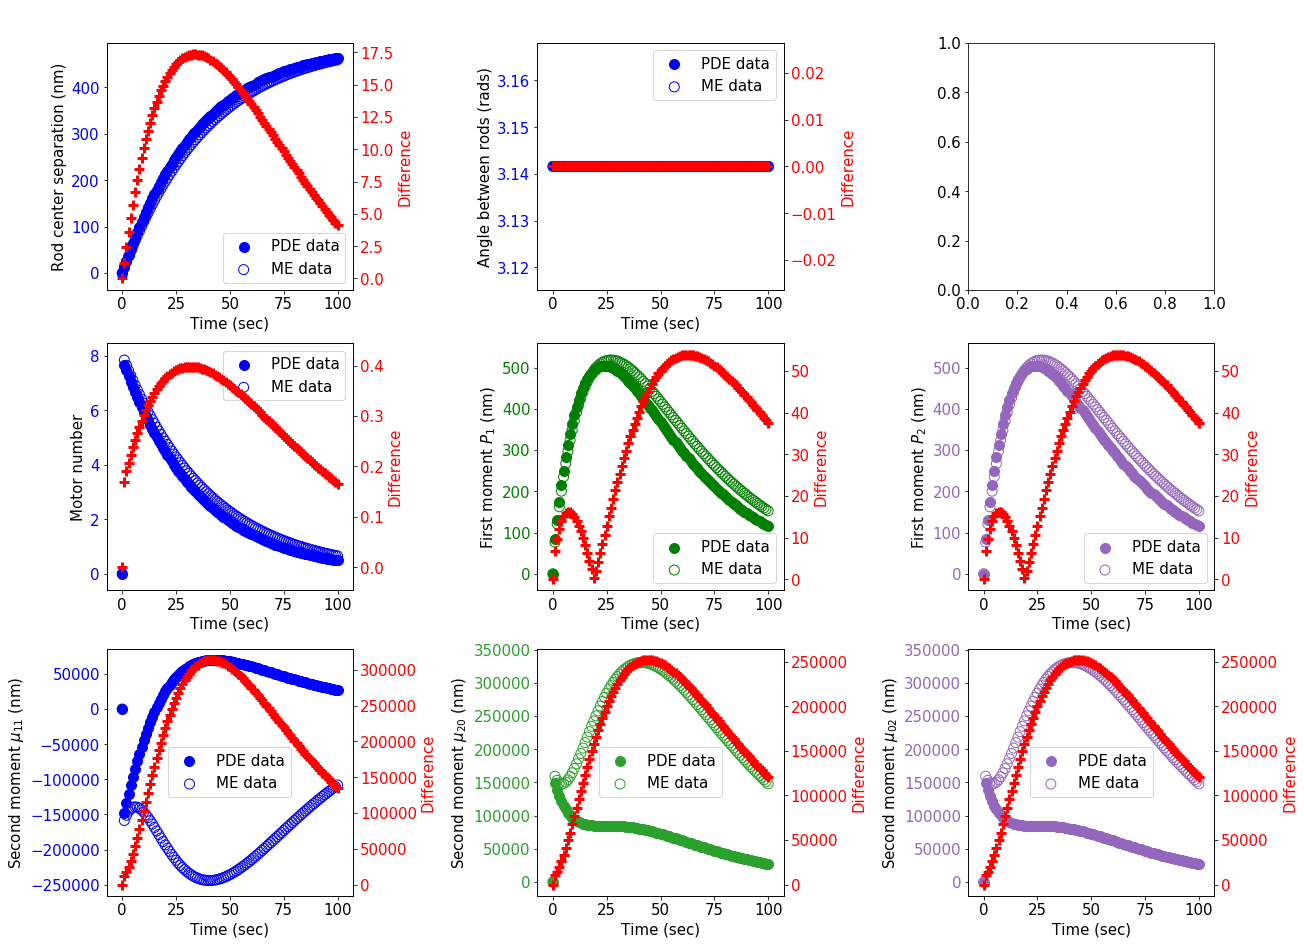

In [90]:
plt.style.use(ase1_runs_stl)
fig = plt.figure(constrained_layout=True, figsize=(18, 13))
gs = fig.add_gridspec(3, 3)
axarr = np.asarray([fig.add_subplot(gs[0, 0]),
                    fig.add_subplot(gs[0, 1]),
                    fig.add_subplot(gs[0, 2]),
                    fig.add_subplot(gs[1, 0]),
                    fig.add_subplot(gs[1, 1]),
                    fig.add_subplot(gs[1, 2]),
                    fig.add_subplot(gs[2, 0]),
                    fig.add_subplot(gs[2, 1]),
                    fig.add_subplot(gs[2, 2]),
                    ])
fig.suptitle(' ')

PDE_sep_arr = PDE_para_data['Analysis/rod_analysis/center_separation'][:]
ME_sep_arr = ME_para_data['Analysis/rod_analysis/center_separation'][:]
graph_comparison_vs_time(axarr[0], time, PDE_sep_arr, ME_sep_arr)
axarr[0].set_ylabel(r'Rod center separation (nm)')
axarr[0].legend(('PDE data', 'ME data', 'error'))

PDE_ang_arr = PDE_para_data['Analysis/rod_analysis/angle_between'][:]
ME_ang_arr = ME_para_data['Analysis/rod_analysis/angle_between'][:]
graph_comparison_vs_time(axarr[1], time, PDE_ang_arr, ME_ang_arr)
axarr[1].set_ylabel(r'Angle between rods (rads)')
axarr[1].legend(('PDE data', 'ME data', 'error'))

PDE_rho_arr = PDE_para_data['Analysis/XL_analysis/zeroth_moment'][:]
ME_rho_arr = ME_para_data['XL_data/zeroth_moment'][:]
graph_comparison_vs_time(axarr[3], time, PDE_rho_arr, ME_rho_arr)
axarr[3].set_ylabel(r'Motor number')
axarr[3].legend(('PDE data', 'ME data', 'error'))

PDE_P1_arr = PDE_para_data['Analysis/XL_analysis/first_moments'][:,0]
ME_P1_arr = ME_para_data['XL_data/first_moments'][:,0]
graph_comparison_vs_time(axarr[4], time, PDE_P1_arr, ME_P1_arr,color='g')
axarr[4].set_ylabel(r'First moment $P_1$ (nm)')
axarr[4].legend(('PDE data', 'ME data', 'error'))

PDE_P2_arr = PDE_para_data['Analysis/XL_analysis/first_moments'][:,1]
ME_P2_arr = ME_para_data['XL_data/first_moments'][:,1]
graph_comparison_vs_time(axarr[5], time, PDE_P2_arr, ME_P2_arr, color='tab:purple')
axarr[5].set_ylabel(r'First moment $P_2$ (nm)')
axarr[5].legend(('PDE data', 'ME data', 'error'))

PDE_mu11_arr = PDE_para_data['Analysis/XL_analysis/second_moments'][:,0]
ME_mu11_arr = ME_para_data['XL_data/second_moments'][:,0]
graph_comparison_vs_time(axarr[6], time, PDE_mu11_arr, ME_mu11_arr,)
axarr[6].set_ylabel(r'Second moment $\mu_{11}$ (nm)')
axarr[6].legend(('PDE data', 'ME data', 'error'))

PDE_mu20_arr = PDE_para_data['Analysis/XL_analysis/second_moments'][:,1]
ME_mu20_arr = ME_para_data['XL_data/second_moments'][:,1]
graph_comparison_vs_time(axarr[7], time, PDE_mu20_arr, ME_mu20_arr, color='tab:green')
axarr[7].set_ylabel(r'Second moment $\mu_{20}$ (nm)')
axarr[7].legend(('PDE data', 'ME data', 'error'))

PDE_mu02_arr = PDE_para_data['Analysis/XL_analysis/second_moments'][:,2]
ME_mu02_arr = ME_para_data['XL_data/second_moments'][:,2]
graph_comparison_vs_time(axarr[8], time, PDE_mu02_arr, ME_mu02_arr, color='tab:purple')
axarr[8].set_ylabel(r'Second moment $\mu_{02}$ (nm)')
axarr[8].legend(('PDE data', 'ME data', 'error'))

In [79]:
PDE_para_data.close()
ME_para_data.close()